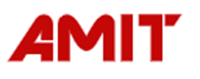
 # Deep Learning Final Project

This final project conclusively proves your understanding and comprehension of each part of the explanation, so you must perform all the following tasks to confirm your understanding and knowledge of each topic.

#### In this exceptional project, we will cover all topics related to deep learning. Therefore, it’s important to study carefully and answer each section thoroughly to demonstrate your understanding of the module. The final part is optional, but it’s highly encouraged if you make an effort to complete it. We will discuss the project in our upcoming lectures with each individual to ensure a comprehensive understanding of this extensive subject.



To assess your understanding we use a popular dataset called MNIST
- The MNIST dataset (Modified National Institute of Standards and Technology) is one of the most well-known datasets in the field of machine learning and computer vision. It consists of:

- Images:

60,000 training images and 10,000 test images.
Each image is a 28x28 grayscale image representing a handwritten digit (0-9).
The pixel values range from 0 (black) to 255 (white).
- Labels:

Each image has a corresponding label indicating which digit (0-9) it represents.

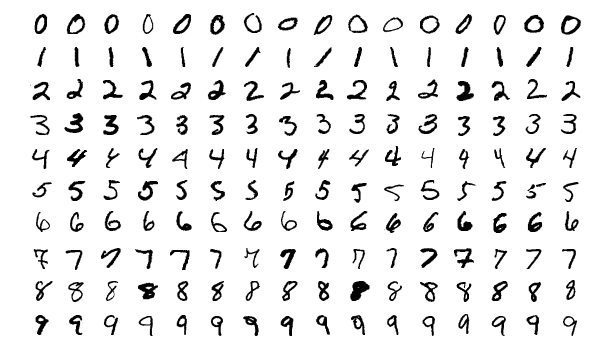

for  every project 

In [3]:
# import Libraries
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)
import sys
sys.path.append("../..")
# import matplotlib_utils
from importlib import reload
from sklearn.model_selection import ParameterGrid
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tqdm import tqdm


We're using TF 2.17.0


# Look at the data

In this task we have 50000 28x28 images of digits from 0 to 9.
We will train a classifier on this data.

In [4]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train [shape (48000, 28, 28)] sample patch:
 [[  0  77 254 154   0]
 [  0 145 253  96   0]
 [  0 254 238  37   0]
 [  0 254 229   0   0]
 [  0 254 246  69   0]]
A closeup of a sample patch:


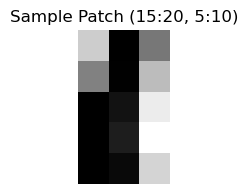

And the whole sample:


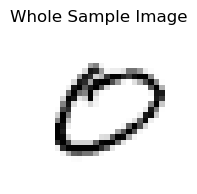

y_train [shape (48000,)] 10 samples:
 [5 0 1 6 1 3 8 8 1 8]


In [5]:
fig, ax = plt.subplots(figsize=(2, 2))  # Set figure size (width, height) in inches

# Display a sample patch from the image
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
ax.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
ax.set_title("Sample Patch (15:20, 5:10)")
ax.axis('off')  # Hide the axes
plt.show()

# Display the whole sample image with a different size
fig, ax = plt.subplots(figsize=(2, 2))  # Adjust the size as needed
print("And the whole sample:")
ax.imshow(X_train[1], cmap="Greys")
ax.set_title("Whole Sample Image")
ax.axis('off')  # Hide the axes
plt.show()

# Display the y_train values
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])


# Load and preprocess the MNIST dataset

In [6]:
import tensorflow as tf

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess data (normalize)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0




# Flatten the images (28x28 -> 784)

In [7]:

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)



# One-hot encode labels

In [8]:

y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
y_test_oh = tf.keras.utils.to_categorical(y_test, 10)



# Define a function to create and compile the model


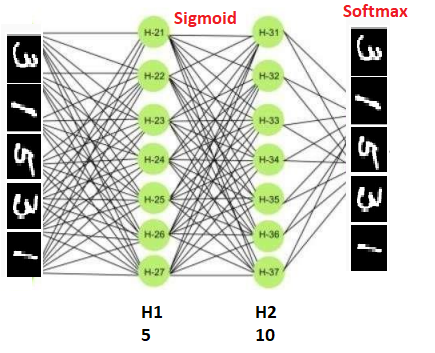

In [9]:
# Define a function to create and compile the model
def create_model(optimizer='adam', learning_rate=0.01):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model using the function
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

Epoch 1/10


C:\Users\MahmoudBarakat\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3866 - loss: 1.8537 - val_accuracy: 0.6851 - val_loss: 1.1060
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7099 - loss: 1.0227 - val_accuracy: 0.7628 - val_loss: 0.8004
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7672 - loss: 0.7772 - val_accuracy: 0.7871 - val_loss: 0.6765
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7993 - loss: 0.6740 - val_accuracy: 0.8371 - val_loss: 0.6055
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8493 - loss: 0.5940 - val_accuracy: 0.8749 - val_loss: 0.5090
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8721 - loss: 0.5101 - val_accuracy: 0.8794 - val_loss: 0.4661
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8768 - loss: 0.4680 - val_accuracy: 0.8823 - val_loss: 0.4452
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8816 - loss: 0.4453 - val_accurac

#### Put here the accuracy of the basic model 
| Accuracy         | 0.8859  |
|--------------|----------------|
 #### Give me the reson for this result
 
 An accuracy of approximately 0.855 (or 85.5%) on the MNIST dataset is reasonable for such a simple neural network model with only one hidden layer of 5 neurons and using the sigmoid activation function.

However, keep in mind that this architecture is quite basic, and you can often achieve much higher accuracy (over 98%) with more complex models, such as:

Increasing the number of neurons in the hidden layer(s).
Adding more hidden layers.
Using a different activation function like ReLU ('relu').
Experimenting with optimizers and learning rates.

# Gride search algorithm to choose the best parameters

for code below try to choose another papmeters and try to built all avalaible parameters


In [13]:
import tensorflow as tf
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm


# Wrap the model using KerasClassifier
model = KerasClassifier(model=create_model,learning_rate=0.001, verbose=0)

# Define the parameter grid for grid search
param_grid = {
    'batch_size': [10,20,40],        # Different batch sizes
    'epochs': [5, 10],               # Different number of epochs
    'optimizer': ['adam', 'rmsprop'],  # Different optimizers
    'learning_rate': [0.001, 0.01]     # Different learning rates
}

# Initialize the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the grid search and wrap with progress bar
with tqdm(total=len(param_grid['batch_size']) * len(param_grid['epochs']), desc="Grid Search Progress", unit="iteration") as pbar:
    grid_result = grid.fit(X_train, y_train_oh)
    pbar.update(1)

# Use cv_results_ instead of the deprecated grid_scores_
print(f"Best score: {grid_result.best_score_} using {grid_result.best_params_}")

# Display the cross-validation results
for mean, std, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"Mean: {mean:.4f}, Std: {std:.4f}, Params: {params}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
test_score = best_model.score(X_test, y_test_oh)
print(f"Test Accuracy: {test_score}")


Grid Search Progress:   0%|          | 0/6 [00:00<?, ?iteration/s]C:\Users\MahmoudBarakat\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Grid Search Progress:  17%|█▋        | 1/6 [08:47<43:55, 527.19s/iteration]


Best score: 0.8745333333333334 using {'batch_size': 10, 'epochs': 10, 'learning_rate': 0.001, 'optimizer': 'adam'}
Mean: 0.8519, Std: 0.0055, Params: {'batch_size': 10, 'epochs': 5, 'learning_rate': 0.001, 'optimizer': 'adam'}
Mean: 0.8651, Std: 0.0055, Params: {'batch_size': 10, 'epochs': 5, 'learning_rate': 0.001, 'optimizer': 'rmsprop'}
Mean: 0.8511, Std: 0.0127, Params: {'batch_size': 10, 'epochs': 5, 'learning_rate': 0.01, 'optimizer': 'adam'}
Mean: 0.8502, Std: 0.0060, Params: {'batch_size': 10, 'epochs': 5, 'learning_rate': 0.01, 'optimizer': 'rmsprop'}
Mean: 0.8745, Std: 0.0023, Params: {'batch_size': 10, 'epochs': 10, 'learning_rate': 0.001, 'optimizer': 'adam'}
Mean: 0.8744, Std: 0.0055, Params: {'batch_size': 10, 'epochs': 10, 'learning_rate': 0.001, 'optimizer': 'rmsprop'}
Mean: 0.8557, Std: 0.0064, Params: {'batch_size': 10, 'epochs': 10, 'learning_rate': 0.01, 'optimizer': 'adam'}
Mean: 0.8546, Std: 0.0074, Params: {'batch_size': 10, 'epochs': 10, 'learning_rate': 0.01, '

In [12]:
print(f"Test Accuracy: {test_score}")

Test Accuracy: 0.8682


- so kindly fill the table below to enhance your good choise  

-parameters on grid search 
| batch_size | optimizer_1 | optimizer_2 | learning_rate_1 | learning_rate_2 |
|------------|-------------|-------------|-----------------|-----------------|
| 2          | adam        | rmsprop     | 0.001           | 0.01            |
| 4          | adam        | rmsprop     | 0.001           | 0.01            |
| 8          | adam        | rmsprop     | 0.001           | 0.01            |
| 16         | adam        | rmsprop     | 0.001           | 0.01            |
| 32         | adam        | rmsprop     | 0.001           | 0.01            |
| 64         | adam        | rmsprop     | 0.001           | 0.01            |

-

 print here the best paramerters give you the best accuracy regarding for archticture design above
- | batch_size         | optimizer | learning_rate      | Accueracy      |
   |--------------|-----|-----|-----------------|
   |20|adam|0.001|0.8745|

- After you know the best optimizer and good Learning rate for the above archticture
- please design your model and put here the final result 

Here  i was converted squentional model into functional ApI Model
- so re-design Your model by adding some hidden layer and change the activation function

In [14]:
import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.001):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    x = tf.keras.layers.Dense(5, activation='sigmoid')(inputs)
    
    # Output layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the Functional API
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=20, batch_size=20, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

Epoch 1/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5324 - loss: 1.6813 - val_accuracy: 0.8148 - val_loss: 0.9043
Epoch 2/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8155 - loss: 0.8294 - val_accuracy: 0.8501 - val_loss: 0.6296
Epoch 3/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8502 - loss: 0.6069 - val_accuracy: 0.8652 - val_loss: 0.5283
Epoch 4/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8625 - loss: 0.5229 - val_accuracy: 0.8734 - val_loss: 0.4806
Epoch 5/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8713 - loss: 0.4863 - val_accuracy: 0.8721 - val_loss: 0.4617
Epoch 6/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8721 - loss: 0.4634 - val_accuracy: 0.8775 - val_loss: 0.4443
Epoch 7/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8779 - loss: 0.4459 - val_accuracy: 0.8783 - val_loss: 0.4303
Epoch 8/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8823 - loss: 0.4247 - 

Total Samples: The MNIST dataset has 60,000 training samples.

Batch Size: If your batch size is set to 40 (for example), each batch consists of 40 samples.

Batches per Epoch: The total number of batches for an epoch is calculated by dividing the total number of samples by the batch size. For instance, with 60,000 samples and a batch size of 40:

Epoch Iteration: During each epoch, the model goes through all the batches (1500 in this case), which means it sees all the training data once.



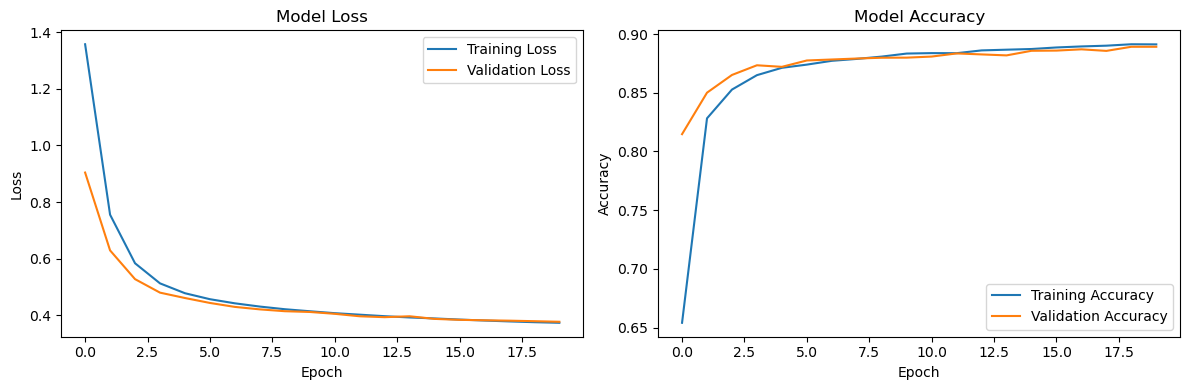

In [15]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step


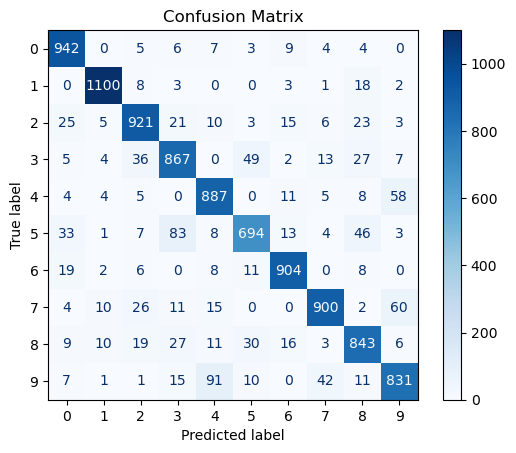

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

# Convert predictions and true labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_oh, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Hints!!!!

Total batches = Total samples / Batch size = 10,000 / 32 ≈ 313 batches.

# Answer the below Questions 

# Q1
### Why is the sigmoid function considered ineffective for hidden layers, and what are the benefits of using it in the output layer?

Vanishing Gradient Problem:

The sigmoid function squashes input values into a range between 0 and 1. For very large or very small inputs, the function saturates, meaning its output becomes close to 0 or 1. In these regions, the derivative (gradient) of the sigmoid function is very small.
During backpropagation, these small gradients cause the weights in earlier layers to receive very little update, which leads to slow or stalled training, especially in deep networks. This is known as the vanishing gradient problem.
Output Range (0 to 1):

Since the sigmoid function outputs values in the range [0, 1], it isn't centered around zero. This causes all activations to be positive, which can lead to inefficient learning. The gradients will always have the same sign, reducing the chance of correcting errors effectively in weight updates.
Slow Convergence:

The exponential nature of the sigmoid function causes activations to change slowly, especially for inputs far from zero. This results in slow convergence during training because weight updates are small.

Benefits in the Output Layer:
Probabilistic Interpretation:

When used in the output layer, the sigmoid function's output represents the probability of a binary classification task. It maps any real-valued number to a range between 0 and 1, making it ideal for predicting probabilities.
Binary Classification:

In binary classification problems, the sigmoid function is often used because it produces a single value that can be interpreted as the probability of belonging to the positive class (e.g., class 1). This makes it suitable for tasks where the output needs to indicate whether an instance belongs to one of two categories.

# Q2: For your enhanced model, please use the grid search algorithm to explore various optimization algorithms. Provide a brief description of each type and then list the best one in the table below.

In [17]:
model = KerasClassifier(model=create_model,learning_rate=0.001, verbose=0)

# Define the parameter grid for grid search
param_grid = {
    'batch_size': [20],        # Different batch sizes
    'epochs': [20],               # Different number of epochs
    'optimizer': ['adam', 'rmsprop','SGD','Momentum','AdaDelta','Adagrad'],  # Different optimizers
    'learning_rate': [0.001]     # Different learning rates
}

# Initialize the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the grid search and wrap with progress bar
with tqdm(total=len(param_grid['batch_size']) * len(param_grid['epochs']), desc="Grid Search Progress", unit="iteration") as pbar:
    grid_result = grid.fit(X_train, y_train_oh)
    pbar.update(1)

# Use cv_results_ instead of the deprecated grid_scores_
print(f"Best score: {grid_result.best_score_} using {grid_result.best_params_}")

# Display the cross-validation results
for mean, std, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"Mean: {mean:.4f}, Std: {std:.4f}, Params: {params}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
test_score = best_model.score(X_test, y_test_oh)
print(f"Test Accuracy: {test_score}")


Grid Search Progress: 100%|██████████| 1/1 [05:32<00:00, 332.87s/iteration]


Best score: 0.8799166666666668 using {'batch_size': 20, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'Momentum'}
Mean: 0.8682, Std: 0.0158, Params: {'batch_size': 20, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'adam'}
Mean: 0.8658, Std: 0.0063, Params: {'batch_size': 20, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'rmsprop'}
Mean: 0.8761, Std: 0.0140, Params: {'batch_size': 20, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'SGD'}
Mean: 0.8799, Std: 0.0038, Params: {'batch_size': 20, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'Momentum'}
Mean: 0.8734, Std: 0.0046, Params: {'batch_size': 20, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'AdaDelta'}
Mean: 0.8746, Std: 0.0107, Params: {'batch_size': 20, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'Adagrad'}
Test Accuracy: 0.8763



| Optimizer   | Accuracy       |
|-------------|----------------|
| SGD         | 0.8761               |
| Momentum    |0.8799166666666668                 |
| RMSprop     | 0.8658               |
| AdaDelta    | 0.8799               |
| Adagrad     |   0.8746             |
| Adam        |0.8682                |

-

# Q3: What is the main cause of the vanishing gradient problem, and how can we solve it?

the gradients of the loss function become extremely small as they are propagated backward through the network. This results in very slow or stalled updates for the weights in earlier layers, making it difficult for the network to learn effectively.
Solutions to the Vanishing Gradient Problem:
Use Different Activation Functions:

ReLU (Rectified Linear Unit): The ReLU activation function 

f(x)=max(0,x) does not suffer from the vanishing gradient problem because its derivative is 1 for positive inputs. This helps maintain larger gradients during backpropagation.
Variants of ReLU: Such as Leaky ReLU, Parametric ReLU (PReLU), and ELU (Exponential Linear Unit) help address issues where ReLU might cause dead neurons (neurons that never activate).
Weight Initialization Techniques:

Proper weight initialization helps maintain gradient magnitudes. Some popular initialization methods include:
Xavier/Glorot Initialization: Suitable for tanh and sigmoid activation functions.
He Initialization: Designed for ReLU and its variants to prevent gradients from shrinking or exploding.
Batch Normalization:

Batch normalization normalizes the inputs of each layer, ensuring that they have a mean of 0 and a standard deviation of 1. This helps mitigate the issue by preventing the outputs from becoming too small or large, leading to more stable training and reducing the vanishing gradient effect.
Gradient Clipping:

In certain cases, gradient clipping can be used to limit the size of gradients during backpropagation, preventing them from becoming too small or too large. This is particularly useful for recurrent neural networks (RNNs), which often suffer from vanishing/exploding gradients.
Use of Shorter Networks or Residual Connections:

Residual Networks (ResNets) introduce shortcut (skip) connections, allowing gradients to bypass certain layers. This helps gradients flow more easily through the network, reducing the chances of them vanishing.

## "In the code below, the model is likely experiencing the vanishing gradient problem. Try to solve it in a separate cell."

In [70]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal
w_init = RandomNormal(mean=1,stddev=1)
model_2 = Sequential()
model_2.add(Dense(128, activation= 'sigmoid', kernel_initializer =w_init , input_dim=28*28))
model_2.add(Dense(128, activation= 'sigmoid', kernel_initializer =w_init ))
model_2.add(Dense(10, activation= 'softmax', kernel_initializer =w_init))
model_2.compile(loss = 'sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
model_2.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 128)               100480    
                                                                 
 dense_111 (Dense)           (None, 128)               16512     
                                                                 
 dense_112 (Dense)           (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


c:\Users\Gsamuel\Desktop\R-D-ML-vision\teamcvpy\venv\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [18]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import HeNormal  # Import He initialization

# Use He initialization suitable for ReLU
w_init = HeNormal()

# Define the model
model_2 = Sequential()
# Using ReLU activation and He initialization for hidden layers
model_2.add(Dense(128, activation='relu', kernel_initializer=w_init, input_dim=28*28))
model_2.add(Dense(128, activation='relu', kernel_initializer=w_init))
# Output layer remains the same, suitable for multi-class classification
model_2.add(Dense(10, activation='softmax'))

# Compile the model with sparse categorical crossentropy loss and Adam optimizer
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display model summary
model_2.summary()

C:\Users\MahmoudBarakat\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history2=model_2.fit(X_train,y_train,epochs=10 , batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8262 - loss: 0.6163 - val_accuracy: 0.9515 - val_loss: 0.1647
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9572 - loss: 0.1446 - val_accuracy: 0.9632 - val_loss: 0.1199
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0916 - val_accuracy: 0.9682 - val_loss: 0.1048
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9782 - loss: 0.0706 - val_accuracy: 0.9689 - val_loss: 0.1097
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9832 - loss: 0.0540 - val_accuracy: 0.9729 - val_loss: 0.0924
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0412 - val_accuracy: 0.9708 - val_loss: 0.0982
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9909 - loss: 0.0310 - val_accuracy: 0.9703 - val_loss: 0.1006
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9933 - loss: 0.0252 - val_accuracy: 0.

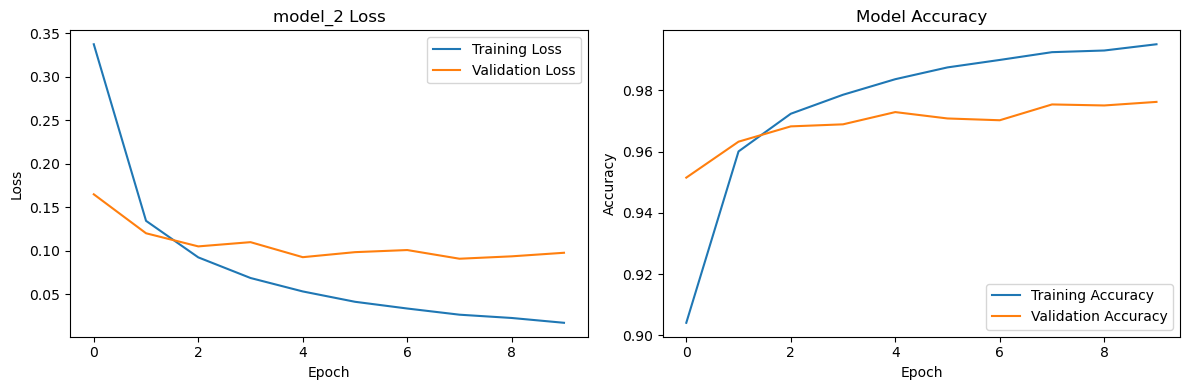

In [20]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('model_2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

#### After providing your answer to the question above, please share your opinion on how to improve the performance of this model or address the issue described.

# Exploding Gradient

# Q4: What is the main cause of the Exploding gradient problem, and how can we solve it?

The exploding gradient problem occurs when the gradients of a neural network become excessively large during training. This can lead to unstable updates, causing the model's parameters to diverge and resulting in NaN values in the loss function or weights.

Main Causes of the Exploding Gradient Problem:
Deep Networks:

In deep networks, when gradients are propagated back through many layers, they can be multiplied by large weights, causing the gradient values to grow exponentially. This is particularly problematic with certain activation functions that can lead to large outputs.
Weight Initialization:

Improper initialization of weights, especially if weights are initialized with large values, can lead to large gradients during backpropagation. This can amplify the gradients and exacerbate the problem.
Activation Functions:

Certain activation functions, particularly those that do not have bounded outputs (e.g., ReLU), can lead to situations where the outputs of the layers are very large, resulting in large gradients.
Solutions to the Exploding Gradient Problem:
Gradient Clipping:

Gradient clipping is a common technique where gradients are scaled back if they exceed a certain threshold. This helps prevent the gradients from becoming too large during backpropagation. For example, if the gradient exceeds a threshold value, you can clip it to that threshold.
Use of Appropriate Weight Initialization:

Proper initialization methods, such as Xavier (Glorot) Initialization or He Initialization, help maintain a suitable range for weights, reducing the risk of exploding gradients.
Regularization Techniques:

Adding regularization techniques like L2 regularization can help control the magnitude of the weights, which can, in turn, mitigate the risk of exploding gradients.
Batch Normalization:

Applying batch normalization can stabilize the training process by normalizing the outputs of layers, which helps prevent gradients from becoming too large.
Use of Suitable Activation Functions:

Opt for activation functions that limit output ranges, such as sigmoid or tanh, although they can also cause vanishing gradients. Carefully choosing when to use activations like ReLU and using their variants (e.g., Leaky ReLU) can help.
Skip Connections or Residual Networks:

Residual networks (ResNets) use skip connections to allow gradients to flow through the network more easily without becoming excessively large or small.

In [77]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0

# Create a simple neural network with two layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(784,), activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')

# Perform gradient explosion
for _ in range(10):
    with tf.GradientTape() as tape:
        predictions = model(X_train)
        loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_train, predictions)) #reduce_mean compute the average loss across all the training samples

    gradients = tape.gradient(loss, model.trainable_variables)
    gradients = [tf.clip_by_value(grad, -5.0, 5.0) if grad is not None else grad for grad in gradients]
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print the gradient norms
    gradient_norms = [tf.norm(grad).numpy() for grad in gradients]
    print("Gradient Norms:", gradient_norms)

Gradient Norms: [0.5376286, 0.06820975, 1.6572814, 0.20540263]
Gradient Norms: [0.5171178, 0.063379586, 1.5452076, 0.19133505]
Gradient Norms: [0.49948362, 0.059059102, 1.4445592, 0.17868558]
Gradient Norms: [0.48422638, 0.055169467, 1.3536377, 0.1672437]
Gradient Norms: [0.47094956, 0.051647596, 1.2710757, 0.15683961]
Gradient Norms: [0.45933422, 0.048442286, 1.1957525, 0.1473342]
Gradient Norms: [0.44912118, 0.04551133, 1.1267382, 0.13861184]
Gradient Norms: [0.44009784, 0.042819552, 1.0632502, 0.130575]
Gradient Norms: [0.43208876, 0.04033731, 1.0046252, 0.123141184]
Gradient Norms: [0.42494828, 0.03803945, 0.95029753, 0.11623942]


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0

# Create a simple neural network with two layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(784,), activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Perform training with gradient clipping
for _ in range(10):
    with tf.GradientTape() as tape:
        predictions = model(X_train)
        loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_train, predictions))

    gradients = tape.gradient(loss, model.trainable_variables)

    # Clip the gradients to mitigate exploding gradients
    gradients = [tf.clip_by_value(grad, -5.0, 5.0) if grad is not None else grad for grad in gradients]
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print the gradient norms
    gradient_norms = [tf.norm(grad).numpy() for grad in gradients]
    print("Gradient Norms:", gradient_norms)


Gradient Norms: [0.96110755, 0.09020879, 0.5313534, 0.0729422]
Gradient Norms: [0.9547699, 0.08904201, 0.52554077, 0.07090126]
Gradient Norms: [0.9486274, 0.08793684, 0.5200233, 0.0689555]
Gradient Norms: [0.9428241, 0.086883955, 0.51478416, 0.06710123]
Gradient Norms: [0.9372401, 0.08591081, 0.50980526, 0.06533482]
Gradient Norms: [0.9319855, 0.08500986, 0.50507146, 0.06365273]
Gradient Norms: [0.9269612, 0.084163085, 0.50056666, 0.06205093]
Gradient Norms: [0.9220106, 0.083358034, 0.4962791, 0.06052687]
Gradient Norms: [0.9172192, 0.082577296, 0.49219537, 0.059077006]
Gradient Norms: [0.9126916, 0.08186101, 0.48830396, 0.057698734]


## "Please provide proof of the effectiveness of your solution. How does it impact the results?" print here all Gradient term before and after add your solution



................................................................................

...........................................

# Q5: Provide proof of the effectiveness of adding a Dropout layer to the model. Additionally, provide a brief description of how Dropout works and its impact on model performance.

..................................................................

| Dropout    | Accuracy       |
|------------|----------------|
| Before     |                |
| After      |                |


# Q6 Regarding Q2, after enhancing the model, please provide proof of the differences in performance for each activation function used. Compare the results for each activation function to demonstrate how they affect the model's performance.

| Activation Function | Accuracy |
|---------------------|----------|
| ReLU                |          |
| Sigmoid             |          |
| Tanh                |          |
| Leaky ReLU          |          |
| ELU (Exponential Linear Unit) |  |

# Q7: What is the best approach for improving model performance: adding more hidden layers or increasing the number of nodes per hidden layer? Please provide code examples to support your suggestions.

# Q8: Why is it important to normalize data before training a neural network? Explain the reasons and benefits of data normalization in the context of neural network training.

.......................................................................

# Q9 What is batch normalization, and why is it used in neural network training? Describe how batch normalization impacts the learning process and its benefits for training deep networks




..................................................................

# How does batch normalization assist in training deep neural networks? Share your observations and insights after applying batch normalization to your model architecture. If you did not use batch normalization, explain why and provide evidence to support your decision."

.........................................

| batch normalization | Accuracy |
|---------------------|----------|
| Before              |          |
| After               |          |

# Advanced Part (optional)

# Convert your TensorFlow model to PyTorch. Provide the PyTorch code equivalent of your TensorFlow model, ensuring that the architecture, hyperparameters, and any custom layers or functionalities are correctly translated."

# Finally, print the accuracy for each model architecture. Discuss with your team the differences observed in accuracy across various architectures, and analyze the potential reasons behind these variations."

# Callback

### search for Callback method In TensorFlow and Keras, a callback is a set of functions that can be applied at various stages of the training process, allowing you to customize the behavior of the training loop. Callbacks provide a way to monitor and intervene during training, enabling features 

# Tensorboard!!!!!!

## Review the following code and provide a detailed explanation of how it works. Describe each section and its purpose, and explain how the code achieves its intended functionality.

In [82]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

# Split data into training and validation sets
X_val, X_train = X_train[:10000], X_train[10000:]
y_val, y_train = y_train[:10000], y_train[10000:]

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

def train_and_evaluate(optimizer, X_train, y_train, X_val, y_val):
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        epochs=10, 
                        validation_data=(X_val, y_val),
                        verbose=0)
    
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define different optimizers
optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'Momentum': tf.keras.optimizers.SGD(momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'AdaDelta': tf.keras.optimizers.Adadelta(),
    'Adagrad': tf.keras.optimizers.Adagrad(),
    'Adam': tf.keras.optimizers.Adam()
}

# Train and evaluate models with different optimizers
results = {}
for name, optimizer in optimizers.items():
    accuracy = train_and_evaluate(optimizer, X_train, y_train, X_val, y_val)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"Optimizer: {name}, Validation Accuracy: {accuracy:.4f}")


Optimizer: SGD, Validation Accuracy: 0.9479
Optimizer: Momentum, Validation Accuracy: 0.9769
Optimizer: RMSprop, Validation Accuracy: 0.9733
Optimizer: AdaDelta, Validation Accuracy: 0.7745
Optimizer: Adagrad, Validation Accuracy: 0.9052
Optimizer: Adam, Validation Accuracy: 0.9766


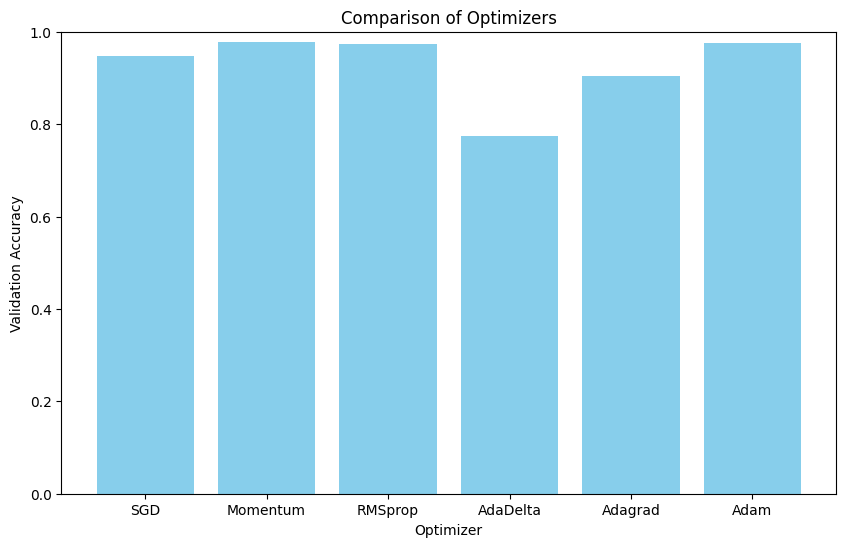

In [83]:
# Plotting the results
names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(names, accuracies, color='skyblue')
plt.xlabel('Optimizer')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Optimizers')
plt.ylim([0, 1])
plt.show()

# Anothe challenge

# In this dataset, all deep learning architectures attempted so far have resulted in overfitting. Explore and apply various techniques to mitigate overfitting, such as regularization, dropout, data augmentation, and early stopping. Please provide feedback on the effectiveness of each method and summarize your results.

# Dataset Description

This dataset contains information related to students in an educational context. It includes various demographic, behavioral, and academic features, which can be used to analyze student performance and engagement. The dataset consists of the following attributes:

- **gender:** The gender of the student (e.g., male, female).
- **NationalITy:** The nationality of the student, which may influence educational outcomes.
- **PlaceofBirth:** The geographic location where the student was born, providing insights into potential cultural and socio-economic factors.
- **StageID:** The educational stage or level the student is currently in (e.g., primary, secondary).
- **GradeID:** The grade or year the student is enrolled in, indicating their progress in the education system.
- **SectionID:** The specific section or class within a grade that the student belongs to.
- **Topic:** The subject or topic of study, relevant for performance analysis in specific areas.
- **Semester:** The semester in which the data was collected, which may affect academic performance and engagement.
- **Relation:** The relationship of the student with their parents (e.g., mother, father), potentially influencing support and academic outcomes.
- **raisedhands:** The number of times the student raised their hands in class, indicating participation and engagement.
- **VisITedResources:** The number of educational resources the student has accessed, which reflects their engagement with the material.
- **AnnouncementsView:** The number of times the student viewed announcements from the school, suggesting their awareness of important updates.
- **Discussion:** The level of participation in discussions, indicating engagement in collaborative learning.
- **ParentAnsweringSurvey:** Responses from parents in a survey, which may provide insights into parental involvement.
- **ParentschoolSatisfaction:** The satisfaction level of parents with the school, which could correlate with student performance.
- **StudentAbsenceDays:** The number of days the student was absent, which can impact learning outcomes.
- **Class:** The target variable indicating the student's performance category or final grade, often used for classification tasks.

**Challenges:** The dataset may exhibit challenges such as class imbalance, varying levels of engagement among students, and the influence of external factors on academic performance.

This dataset is suitable for analysis aimed at understanding student behavior, predicting academic outcomes, and identifying factors contributing to student success or challenges.


In [85]:
import os

import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

from matplotlib import pyplot as plt
import seaborn as sns


In [86]:
df = pd.read_csv('Dataset.csv')
df.loc[df["Class"] == "L", "Class"] = 0
df.loc[df["Class"] == "M", "Class"] = 1
df.loc[df["Class"] == "H", "Class"] = 2
display(df)
print(df.columns)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,0
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,1
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,1
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,0


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')
